Data downloaded from:
* www.jenster.com/nottingham.xlsx
* www.jenster.com/index.xlsx

Those data are part of a workshop called "descriptive analysis" conducted by Jenifer on GICJ2017 in South Africa

## Cheating our children

Read the related news here:

* http://www.ajc.com/news/cheating-our-children/scores/

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('nottingham.xlsx')

In [3]:
df.head()

,RecType,Schoolme,Address1,Address2,Address3,Town,PostCode,TelNum,SchoolType,TotPup,TotElig,AVG_ENG_MATH_SCORE_07,AVG_ENG_MATH_SCORE_08,AVG_ENG_MATH_SCORE_09,AVG_ENG_MATH_SCORE_10,P_ABSENT_PERSIST
0,1,Claremont Primary and Nursery School,Claremont Road,Off Huckll Road,,Nottingham,NG5 1BH,0115 9156870,CY,337,49.0,25.1,26.0,26.2,26.4,11.3
1,1,Windmill Primary & Nursery School,Sneinton Boulevard,,,Nottingham,NG2 4FZ,0115 9150195,CY,442,86.0,24.9,25.2,23.9,24.7,8.6
2,1,Stanstead Nursery and Primary School,Stanstead Avenue,Rise Park,Stanstead Avenue,Nottingham,NG5 5BL,0115 9156300,CY,198,24.0,28.0,25.5,27.1,24.7,7.7
3,1,Nottingham Academy,Sneinton Boulevard,,Sneinton,Nottingham,NG2 4GL,0115 9103200,AC,2170,68.0,NaN,NaN,NaN,NaN,7.6
4,1,Southwark Primary School,Bulwell Lane,Old Basford,,Nottingham,NG6 0BS,0115 9150466,CY,531,69.0,27.1,26.6,27.4,26.8,7.3


In [4]:
df.describe()

,RecType,TotPup,TotElig,AVG_ENG_MATH_SCORE_07,AVG_ENG_MATH_SCORE_08,AVG_ENG_MATH_SCORE_09,AVG_ENG_MATH_SCORE_10,P_ABSENT_PERSIST
count,207.000000,207.000000,205.000000,179.000000,182.000000,187.000000,139.000000,193.000000
mean,1.057971,257.705314,37.097561,27.497207,27.518681,27.566845,27.720863,2.067876
std,0.234255,175.026559,18.858613,2.031865,1.667029,1.641424,1.727295,1.982187
min,1.000000,0.000000,2.000000,15.000000,22.900000,23.500000,23.300000,0.000000
25%,1.000000,179.000000,25.000000,26.200000,26.300000,26.400000,26.450000,0.600000
50%,1.000000,230.000000,34.000000,27.800000,27.400000,27.600000,27.800000,1.500000
75%,1.000000,319.000000,50.000000,28.850000,28.800000,28.750000,28.950000,2.900000
max,2.000000,2170.000000,119.000000,31.900000,31.200000,31.600000,32.300000,11.300000


The columns:

* `AVG_ENG_MATH_SCORE_xx` The **average** score for the particular class of year xx. For a class, this metric is the higher the better
* `P_ABSENT_PERSIST` the absent ratio transformed somehow, the higher the worse.

This is multi dimensional data. We are interested in the relationship between those dimensions/ variables.

In [5]:
len(df)

207

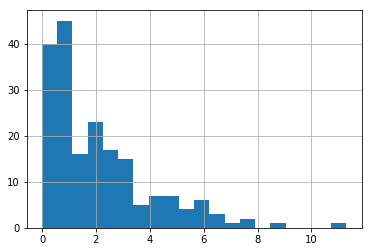

In [6]:
df['P_ABSENT_PERSIST'].hist(bins=20)

**Question**:

* What do you conclude from this histogram?
* What would you do next to mine the news?

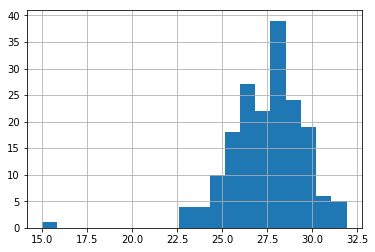

In [7]:
df['AVG_ENG_MATH_SCORE_07'].hist(bins=20)

In [9]:
df[df['AVG_ENG_MATH_SCORE_07'] < 16]

,RecType,Schoolme,Address1,Address2,Address3,Town,PostCode,TelNum,SchoolType,TotPup,TotElig,AVG_ENG_MATH_SCORE_07,AVG_ENG_MATH_SCORE_08,AVG_ENG_MATH_SCORE_09,AVG_ENG_MATH_SCORE_10,P_ABSENT_PERSIST
199,2,Carlton Digby School,61 Digby Avenue,Mapperley,,Nottingham,NG3 6DS,0115 9568289,CYS,58,5.0,15.0,NaN,NaN,NaN,NaN


Text(0.5,1,'AVG_ENG_MATH_SCORE_10')

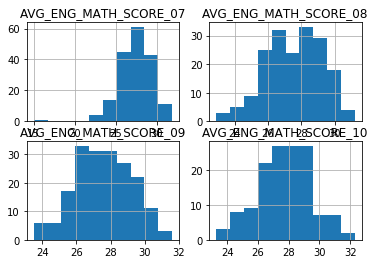

In [14]:
plt.subplot(2, 2, 1)
df['AVG_ENG_MATH_SCORE_07'].hist(bins=10)
plt.title('AVG_ENG_MATH_SCORE_07')

plt.subplot(2, 2, 2)
df['AVG_ENG_MATH_SCORE_08'].hist(bins=10)
plt.title('AVG_ENG_MATH_SCORE_08')


plt.subplot(2, 2, 3)
df['AVG_ENG_MATH_SCORE_09'].hist(bins=10)
plt.title('AVG_ENG_MATH_SCORE_09')


plt.subplot(2, 2, 4)
df['AVG_ENG_MATH_SCORE_10'].hist(bins=10)
plt.title('AVG_ENG_MATH_SCORE_10')

## The relationship between absence and score

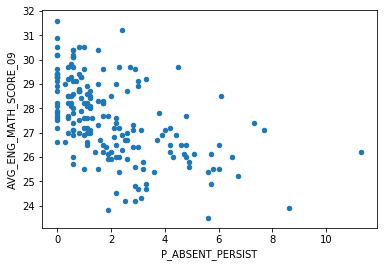

In [15]:
df.plot('P_ABSENT_PERSIST', 'AVG_ENG_MATH_SCORE_09', kind='scatter')

The higher the absence ratio, the lower the test score in general. Two questions:

* Is this relationship strong enough?
* What are the outliers?

In [16]:
help(df['P_ABSENT_PERSIST'].corr)

Help on method corr in module pandas.core.series:

corr(other, method='pearson', min_periods=None) method of pandas.core.series.Series instance
    Compute correlation with `other` Series, excluding missing values
    
    Parameters
    ----------
    other : Series
    method : {'pearson', 'kendall', 'spearman'}
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
    min_periods : int, optional
        Minimum number of observations needed to have a valid result
    
    
    Returns
    -------
    correlation : float



In [17]:
df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_09'], method='pearson')

-0.5205965225654683

**Note**:

* Pearson correlation is between [-1, 1]
* Values around 0 means no correlation/ weak correlation
* Values near 1 and -1 can be interpreted as strong (linear) correlation

Pearson correlation does not work very well with non-linear correlation or when the variables are not (jointly) normally distributed. It is also senstive to outliers. Spearman's rank correlation can help here. 

In [18]:
df['AVG_ENG_MATH_SCORE_09'].rank()[:10]

0     42.0
1      3.0
2     77.0
3      NaN
4     90.0
5     13.0
6     32.5
7      NaN
8    129.5
9     52.0
Name: AVG_ENG_MATH_SCORE_09, dtype: float64

In [20]:
df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_09'], method='spearman')

-0.5810765727681304

In [37]:
pd.Series([1, 30, 20, -1])

0     1
1    30
2    20
3    -1
dtype: int64

In [38]:
pd.Series([1, 30, 20, -1]).rank()

0    2.0
1    4.0
2    3.0
3    1.0
dtype: float64

In [26]:
df['AVG_ENG_MATH_SCORE_09'].rank().rank().rank()

0       42.0
1        3.0
2       77.0
3        NaN
4       90.0
5       13.0
6       32.5
7        NaN
8      129.5
9       52.0
10      19.0
11      19.0
12      37.5
13      11.5
14       1.0
15      15.0
16       NaN
17      37.5
18      22.5
19      25.5
20      32.5
21     102.0
22      52.0
23      37.5
24      52.0
25     170.0
26      66.0
27      32.5
28      83.5
29      52.0
       ...  
177    161.5
178    143.0
179     57.0
180    161.5
181     83.5
182    187.0
183    156.5
184    156.5
185    185.0
186    177.0
187    137.5
188    102.0
189    161.5
190    113.5
191    156.5
192    165.5
193      NaN
194      NaN
195      NaN
196      NaN
197      NaN
198      NaN
199      NaN
200      NaN
201      NaN
202      NaN
203      NaN
204      NaN
205      NaN
206      NaN
Name: AVG_ENG_MATH_SCORE_09, Length: 207, dtype: float64

In [21]:
df['P_ABSENT_PERSIST'].rank().corr(df['AVG_ENG_MATH_SCORE_09'].rank(), method='spearman')

-0.5810765727681304

**Quiz**:

* Why the above two works the same?

In [27]:
sum(df['AVG_ENG_MATH_SCORE_09'].rank() == df['AVG_ENG_MATH_SCORE_09'].rank().rank())

187

In [28]:
len(df['AVG_ENG_MATH_SCORE_09'].rank())

207

### The correlation for all grades

In [39]:
df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_10'], method='spearman')

-0.4977757689875953

In [40]:
df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_09'], method='spearman')

-0.5810765727681304

In [41]:
df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_08'], method='spearman')

-0.6002183459864541

In [43]:
df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_07'], method='spearman')

-0.5038740642509405

## Better visualisation

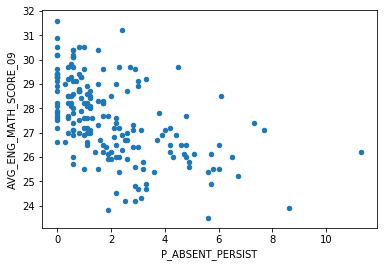

In [44]:
df.plot('P_ABSENT_PERSIST', 'AVG_ENG_MATH_SCORE_09', kind='scatter')

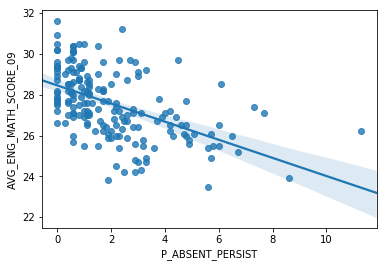

In [45]:
sns.regplot(df['P_ABSENT_PERSIST'], df['AVG_ENG_MATH_SCORE_09'])

In [47]:
#help(np.polyfit)
np.polyfit(df['P_ABSENT_PERSIST'], df['AVG_ENG_MATH_SCORE_09'], 1)

array([nan, nan])

In [48]:
np.polyfit(df['P_ABSENT_PERSIST'].fillna(0), df['AVG_ENG_MATH_SCORE_09'].fillna(0), 1)

array([ 0.12795693, 24.6566782 ])

**Quiz**: What does it look like if we plot above line? The return value of `polyfit` is Polynomial coefficients, highest power first.

**NOTE:** Try the codes without `filena` and observe the error. Now it is time to do some cleaning.

In [51]:
#df['P_ABSENT_PERSIST'].isna()

In [53]:
na_selector = df['P_ABSENT_PERSIST'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_07'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_08'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_09'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_10'].isna()

In [54]:
len(df[na_selector])

80

In [55]:
len(df)

207

In [62]:
#~(True)
#~na_selector

In [63]:
len(df[~na_selector])

127

In [64]:
df_cleaned = df[~na_selector]

In [66]:
np.polyfit(df_cleaned['P_ABSENT_PERSIST'].fillna(0), 
           df_cleaned['AVG_ENG_MATH_SCORE_09'].fillna(0), 
           1)

array([-0.44654826, 28.54239409])

The prediction: y_hat = 28.54239409 + (-0.44654826) * x

In [67]:
absent = df_cleaned['P_ABSENT_PERSIST']
score_grade09 = df_cleaned['AVG_ENG_MATH_SCORE_09']

In [68]:
estimated_score_grade09 =  28.54239409 + (-0.44654826) * absent

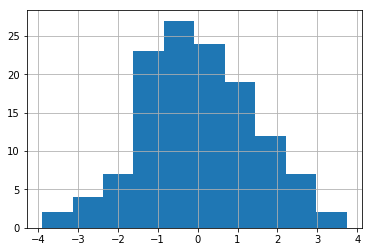

In [69]:
(score_grade09 - estimated_score_grade09).hist()

In [70]:
df_cleaned[(score_grade09 - estimated_score_grade09) > 3]

,RecType,Schoolme,Address1,Address2,Address3,Town,PostCode,TelNum,SchoolType,TotPup,TotElig,AVG_ENG_MATH_SCORE_07,AVG_ENG_MATH_SCORE_08,AVG_ENG_MATH_SCORE_09,AVG_ENG_MATH_SCORE_10,P_ABSENT_PERSIST
62,1,English Martyrs' Catholic Primary,Bracken Road,Long Eaton,,Nottingham,NG10 4DA,0115 9733209,VA,238,26.0,30.7,31.2,31.2,30.6,2.4
182,1,Orston Primary School,Church Street,Orston,,Nottingham,NG13 9NS,01949 850618,CY,123,13.0,31.4,28.0,31.6,30.9,0.0


In [71]:
df_cleaned[(score_grade09 - estimated_score_grade09) > 2.5]

,RecType,Schoolme,Address1,Address2,Address3,Town,PostCode,TelNum,SchoolType,TotPup,TotElig,AVG_ENG_MATH_SCORE_07,AVG_ENG_MATH_SCORE_08,AVG_ENG_MATH_SCORE_09,AVG_ENG_MATH_SCORE_10,P_ABSENT_PERSIST
0,1,Claremont Primary and Nursery School,Claremont Road,Off Huckll Road,,Nottingham,NG5 1BH,0115 9156870,CY,337,49.0,25.1,26.0,26.2,26.4,11.3
62,1,English Martyrs' Catholic Primary,Bracken Road,Long Eaton,,Nottingham,NG10 4DA,0115 9733209,VA,238,26.0,30.7,31.2,31.2,30.6,2.4
94,1,Bleasby CofE Primary School,Station Road,Bleasby,,Nottingham,NG14 7GD,01636 830203,VC,166,23.0,30.6,29.4,30.4,30.0,1.5
182,1,Orston Primary School,Church Street,Orston,,Nottingham,NG13 9NS,01949 850618,CY,123,13.0,31.4,28.0,31.6,30.9,0.0


In [72]:
s = (score_grade09 - estimated_score_grade09)

Get the threshold value for 95% percentile

In [73]:
s.quantile(0.95)

2.3561028962000004

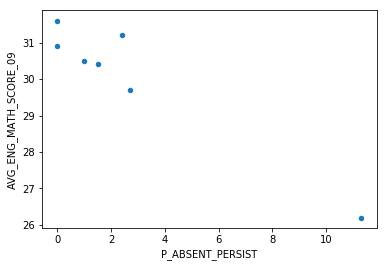

In [74]:
df_cleaned[s > s.quantile(0.95)].plot(
    x='P_ABSENT_PERSIST', 
    y='AVG_ENG_MATH_SCORE_09', 
    kind='scatter')

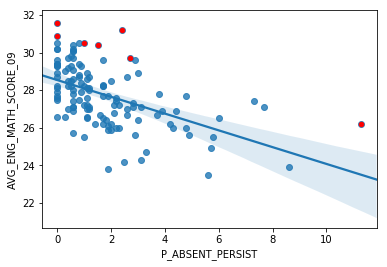

In [77]:
ax = sns.regplot(df_cleaned['P_ABSENT_PERSIST'], df_cleaned['AVG_ENG_MATH_SCORE_09'])
df_cleaned[s > s.quantile(0.95)].plot(
    x='P_ABSENT_PERSIST', 
    y='AVG_ENG_MATH_SCORE_09', 
    kind='scatter',
    color='red',
    ax=ax)

We can adjust the quantile to include/ exclude suspecious schools.

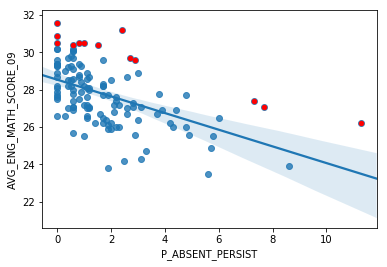

In [78]:
ax = sns.regplot(
    df_cleaned['P_ABSENT_PERSIST'], 
    df_cleaned['AVG_ENG_MATH_SCORE_09'],
)
df_cleaned[s > s.quantile(0.90)].plot(
    x='P_ABSENT_PERSIST', 
    y='AVG_ENG_MATH_SCORE_09', 
    kind='scatter',
    color='red',
    ax=ax)

### A more primitive/ finer controlled way of plotting using matplotlib

Two common tricks for better visuals:

* Add jitter to further scatter the data points
* Use transparency to help identify density

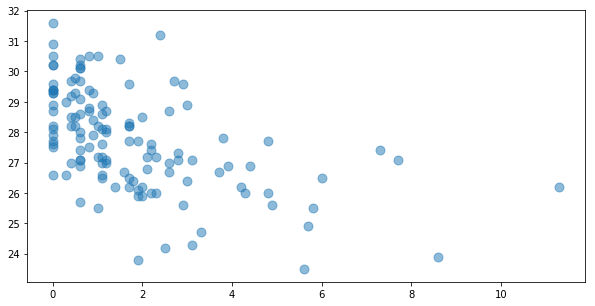

In [79]:
plt.figure(figsize=(10, 5))
plt.scatter(
    df_cleaned['P_ABSENT_PERSIST'], 
    df_cleaned['AVG_ENG_MATH_SCORE_09'],
    s=80, alpha=0.5)

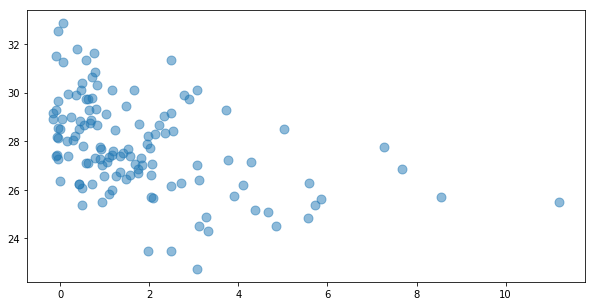

In [80]:
plt.figure(figsize=(10, 5))
plt.scatter(
    df_cleaned['P_ABSENT_PERSIST'] + np.random.normal(0, 0.1, len(df_cleaned)), 
    df_cleaned['AVG_ENG_MATH_SCORE_09'] + np.random.normal(0, 1, len(df_cleaned)),
    s=80, alpha=0.5)

In [83]:
coeffs = np.polyfit(df_cleaned['P_ABSENT_PERSIST'].fillna(0), 
           df_cleaned['AVG_ENG_MATH_SCORE_09'].fillna(0), 
           1)

In [84]:
coeffs

array([-0.44654826, 28.54239409])

In [85]:
trendline_x = np.linspace(df_cleaned['P_ABSENT_PERSIST'].min(), df_cleaned['P_ABSENT_PERSIST'].max())
trendline_y = coeffs[0] * trendline_x + coeffs[1]

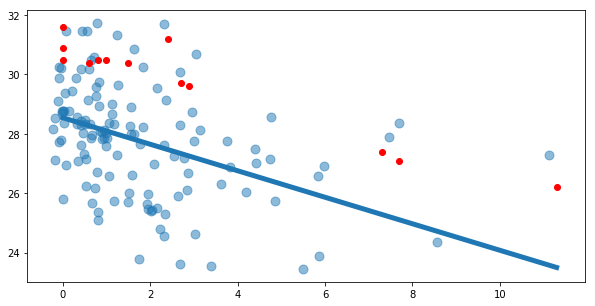

In [86]:
plt.figure(figsize=(10, 5))

plt.scatter(
    df_cleaned['P_ABSENT_PERSIST'] + np.random.normal(0, 0.1, len(df_cleaned)), 
    df_cleaned['AVG_ENG_MATH_SCORE_09'] + np.random.normal(0, 1, len(df_cleaned)),
    s=80, alpha=0.5)

plt.plot(trendline_x, trendline_y, linewidth=5)

plt.scatter(
    df_cleaned[s > s.quantile(0.90)]['P_ABSENT_PERSIST'],
    df_cleaned[s > s.quantile(0.90)]['AVG_ENG_MATH_SCORE_09'],
    color='red'
)

Jitter is good to present data but you need to track how the data is jittered in order to aligh multiple plots. The complete version is followed.

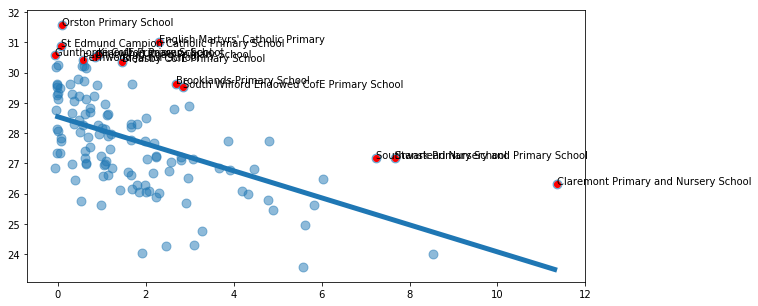

In [87]:
plt.figure(figsize=(10, 5))

# Plot main bubbles

x = df_cleaned['P_ABSENT_PERSIST']
x_jitter = x + np.random.normal(0, 0.05, len(df_cleaned))
y = df_cleaned['AVG_ENG_MATH_SCORE_09'] 
y_jitter = y + np.random.normal(0, 0.1, len(df_cleaned))

plt.scatter(
    x_jitter, 
    y_jitter,
    s=80, alpha=0.5)

# Fit the curve (a line) and plot trendline

coeffs = np.polyfit(x, y, 1)

trendline_x = np.linspace(x.min(), x.max())
trendline_y = coeffs[0] * trendline_x + coeffs[1]

plt.plot(trendline_x, trendline_y, linewidth=5)

# Identify suspecious schools, highlight and label texts

estimated_y = coeffs[0] * x + coeffs[1]
s = y - estimated_y

suspecious_x = x_jitter[s > s.quantile(0.90)].values
suspecious_y = y_jitter[s > s.quantile(0.90)].values
suspecious_t = df_cleaned[s > s.quantile(0.90)]['Schoolme'].values
plt.scatter(
    suspecious_x,
    suspecious_y,
    color='red'
)
for i in range(len(suspecious_t)):
    plt.text(suspecious_x[i], suspecious_y[i], suspecious_t[i])

In [88]:
#suspecious_x

## Conclude the story points

* English and math testing score is plausibly negatively correlated with absence.
* The Spearman rank correlation for grade 10, 9, 8, 7 are -0.4977757689875953, -0.5810765727681304, -0.6002183459864541, -0.5038740642509405
   * The correlation is much stronger for Grade 9 and 8
* There are some outliers who have a high absence ratio but achieve high scores at the same time. After journalists conduct the field invetigation, they find those schools conduct extensive "tutorial schools" for testing score purpose